In [9]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import sys
import seaborn as sns
from scipy.special import comb
from sklearn.preprocessing import PolynomialFeatures
from matplotlib.colors import LogNorm
import pandas as pd
import scipy.stats as st
from matplotlib.patches import Patch

plt.rcParams.update({'font.size': 7,'axes.linewidth':0.5,
                     'xtick.major.size':2,'xtick.major.width':0.5,
                    'ytick.major.size':2,'ytick.major.width':0.5})
plt.rcParams.update({'mathtext.default':  'regular' })


colorMA, colorSI, colorG189E = "#E8735C", "teal", "powderblue"


In [2]:
# set some things
num_mutations_MA = 16
order_MA = 5
total_params_MA = np.sum(np.array([int(comb(num_mutations_MA,i)) for i in range(1,order_MA+1)]))


num_mutations_SI = 15
order_SI = 5
total_params_SI = np.sum(np.array([int(comb(num_mutations_SI,i)) for i in range(1,order_SI+1)]))


num_mutations_G189E = 16
order_G189E = 5
total_params_G189E = np.sum(np.array([int(comb(num_mutations_G189E,i)) for i in range(1,order_G189E+1)]))



# CH65

In [4]:
# read model coefficients

coefs_MA_biochem = np.zeros(total_params_MA+1)
sig_MA_biochem = np.full((total_params_MA+1),0)
with open('../../Epistasis_Inference/MA90/biochemical/CH65_MA90_'+str(order_MA)+'order_biochem.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    num_params = int(next(coef_reader)[-1])
    r2 = float(next(coef_reader)[-1])
    header = next(coef_reader)
    for i in range(total_params_MA+1):
        row = next(coef_reader)
        coefs_MA_biochem[i] = float(row[1])
        if i >= 1:
             if float(row[4])*float(row[5]) > 0:
                sig_MA_biochem[i] = 1
    readfile.close()           
num_sig_MA_biochem = len(np.nonzero(sig_MA_biochem == 1)[0])

coefs_MA_stat = np.zeros(total_params_MA+1)
sig_MA_stat = np.full((total_params_MA+1),0)
with open('../../Epistasis_Inference/MA90/statistical/CH65_MA90_'+str(order_MA)+'order_stat.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    num_params = int(next(coef_reader)[-1])
    r2 = float(next(coef_reader)[-1])
    header = next(coef_reader)
    for i in range(total_params_MA+1):
        row = next(coef_reader)
        coefs_MA_stat[i] = float(row[1])
        if i >= 1:
             if float(row[4])*float(row[5]) > 0:
                sig_MA_stat[i] = 1
    readfile.close()           
num_sig_MA_stat = len(np.nonzero(sig_MA_stat == 1)[0])


print(num_sig_MA_biochem,num_sig_MA_stat)


coefs_SI_biochem = np.zeros(total_params_SI+1)
sig_SI_biochem = np.full((total_params_SI+1),0)
with open('../../Epistasis_Inference/SI06/biochemical/CH65_SI06_newdata_'+str(order_SI)+'order_biochem.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    num_params = int(next(coef_reader)[-1])
    r2 = float(next(coef_reader)[-1])
    header = next(coef_reader)
    for i in range(total_params_SI+1):
        row = next(coef_reader)
        coefs_SI_biochem[i] = float(row[1])
        if i >= 1:
             if float(row[4])*float(row[5]) > 0:
                sig_SI_biochem[i] = 1
    readfile.close()           
num_sig_SI_biochem = len(np.nonzero(sig_SI_biochem == 1)[0])

coefs_SI_stat = np.zeros(total_params_SI+1)
sig_SI_stat = np.full((total_params_SI+1),0)
with open('../../Epistasis_Inference/SI06/statistical/CH65_SI06_'+str(order_SI)+'order_stat.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    num_params = int(next(coef_reader)[-1])
    r2 = float(next(coef_reader)[-1])
    header = next(coef_reader)
    for i in range(total_params_SI+1):
        row = next(coef_reader)
        coefs_SI_stat[i] = float(row[1])
        if i >= 1:
             if float(row[4])*float(row[5]) > 0:
                sig_SI_stat[i] = 1
    readfile.close()           
num_sig_SI_stat = len(np.nonzero(sig_SI_stat == 1)[0])


print(num_sig_SI_biochem,num_sig_SI_stat)

coefs_G189E_biochem = np.zeros(total_params_G189E+1)
sig_G189E_biochem = np.full((total_params_G189E+1),0)
with open('../../Epistasis_Inference/G189E/biochemical/CH65_G189E_newdata_'+str(order_G189E)+'order_biochem.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    num_params = int(next(coef_reader)[-1])
    r2 = float(next(coef_reader)[-1])
    header = next(coef_reader)
    for i in range(total_params_G189E+1):
        row = next(coef_reader)
        coefs_G189E_biochem[i] = float(row[1])
        if i >= 1:
             if float(row[4])*float(row[5]) > 0:
                sig_G189E_biochem[i] = 1
    readfile.close()           
num_sig_G189E_biochem = len(np.nonzero(sig_G189E_biochem == 1)[0])

coefs_G189E_stat = np.zeros(total_params_G189E+1)
sig_G189E_stat = np.full((total_params_G189E+1),0)
with open('../../Epistasis_Inference/G189E/statistical/CH65_G189E_'+str(order_G189E)+'order_stat.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    num_params = int(next(coef_reader)[-1])
    r2 = float(next(coef_reader)[-1])
    header = next(coef_reader)
    for i in range(total_params_G189E+1):
        row = next(coef_reader)
        coefs_G189E_stat[i] = float(row[1])
        if i >= 1:
             if float(row[4])*float(row[5]) > 0:
                sig_G189E_stat[i] = 1
    readfile.close()           
num_sig_G189E_stat = len(np.nonzero(sig_G189E_stat == 1)[0])


print(num_sig_G189E_biochem,num_sig_G189E_stat)


248 502
317 455
236 374


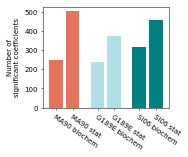

In [10]:
fig,ax = plt.subplots(figsize=(2.6,2.2))

width = 0.1
adj = 0.01

plt.bar(1-width/2-adj,num_sig_MA_biochem,width=width,color=colorMA)
plt.bar(1+width/2+adj,num_sig_MA_stat,width=width,color=colorMA)

plt.bar(1.6-width/2-adj,num_sig_SI_biochem,width=width,color=colorSI)
plt.bar(1.6+width/2+adj,num_sig_SI_stat,width=width,color=colorSI)

plt.bar(1.3-width/2-adj,num_sig_G189E_biochem,width=width,color=colorG189E)
plt.bar(1.3+width/2+adj,num_sig_G189E_stat,width=width,color=colorG189E)

plt.xticks([1-width/2-adj,1+width/2+adj,1.3-width/2-adj,1.3+width/2+adj,1.6-width/2-adj,1.6+width/2+adj],
           ['MA90 biochem','MA90 stat','G189E biochem','G189E stat','SI06 biochem','SI06 stat']
           ,rotation=-35,ha='left',rotation_mode="anchor")
plt.ylabel('Number of\nsignificant coefficients')
plt.tight_layout()
plt.savefig('images/sig_coef_comparison_CH65.pdf')
plt.show()


